## Test avec minimize, pour reprendre l'optimisation à partir de calculs déjà effectués

### Effacer le fichier d'enregistrement du dernier état

In [126]:
import os

def delete_file(file_path):
    """
    Efface un fichier spécifié par son chemin.
    
    Parameters:
    file_path (str): Chemin complet du fichier à effacer.
    """
    try:
        os.remove(file_path)
        print(f"Le fichier '{file_path}' a été effacé avec succès.")
    except FileNotFoundError:
        print(f"Le fichier '{file_path}' n'existe pas.")
    except PermissionError:
        print(f"Permission refusée : Impossible d'effacer '{file_path}'.")
    except Exception as e:
        print(f"Une erreur s'est produite lors de la tentative d'effacement du fichier '{file_path}': {e}")

file_path = 'C:/Users/TOUGERON/Documents/PRO/CODES/optimization_state.pkl'
delete_file(file_path)

Le fichier 'C:/Users/TOUGERON/Documents/PRO/CODES/optimization_state.pkl' a été effacé avec succès.


In [139]:
import numpy as np
import scipy.optimize as opt
import pickle

# Fonction objective
def objective(x):
    return x[0]**2 + x[1]**2

# Fonction pour sauvegarder l'état
def save_state(state, filename):
    with open(filename, 'wb') as f:
        pickle.dump(state, f)

# Fonction pour charger l'état
def load_state(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Callback pour sauvegarder l'état pendant l'optimisation
class SaveStateCallback:
    def __init__(self, filename, interval=10):
        self.filename = filename
        self.interval = interval
        self.iteration = 0

    def __call__(self, xk):
        if self.iteration % self.interval == 0:
            state = {
                'x': xk,
                'iteration': self.iteration
            }
            save_state(state, self.filename)
        self.iteration += 1

# Initial guess
x0 = [10, 10]
state_filename = 'optimization_state.pkl'

# Charger l'état précédent si disponible
try:
    state = load_state(state_filename)
    x0 = state['x']
    iteration = state['iteration']
    print(f"Reprise de l'optimisation à partir de l'itération {iteration} avec x0 = {x0}")
except FileNotFoundError:
    iteration = 0
    print("Aucun état sauvegardé trouvé, démarrage d'une nouvelle optimisation.")

# Définir le callback pour sauvegarder l'état toutes les 10 itérations
callback = SaveStateCallback(state_filename, interval=10)

# Lancer l'optimisation
result = opt.minimize(objective, x0, method='L-BFGS-B', callback=callback)

# Résultats
print("Résultats de l'optimisation :", result.x)
print("Objectif après l'optimisation :", objective(result.x))


Reprise de l'optimisation à partir de l'itération 0 avec x0 = [-2.01255403e-09 -2.01255403e-09]
Résultats de l'optimisation : [-2.01255403e-09 -2.01255403e-09]
Objectif après l'optimisation : 8.100747416823966e-18


## Test pour le GACO

In [103]:
import openturns as ot

# Fonction objective
def objective(x):
    return [x[0]**2 + x[1]**2]

problem = ot.OptimizationProblem(ot.PythonFunction(2, 1, objective))
problem.setMinimization(True)
uniform = ot.ComposedDistribution([ot.Uniform(-100, 100), ot.Uniform(-100, 100)])
bounds = ot.Interval([-100,-100],[100,100])
problem.setBounds(bounds)
ot.RandomGenerator.SetSeed(0)


init_pop = uniform.getSample(10)

for i in range(10):
    print(f'------ Iteration {i} ------')
    # Définir le callback pour sauvegarder l'état toutes les 10 itérations
    algo = ot.Pagmo(problem, "gaco", init_pop)
    algo.run()
    result = algo.getResult()
    print("Résultats de l'optimisation :", result.getOptimalPoint())
    print("Objectif après l'optimisation :", result.getOptimalValue())
    init_pop = result.getFinalPoints()



------ Iteration 0 ------
Résultats de l'optimisation : [-0.00469041,-0.0012332]
Objectif après l'optimisation : [2.35208e-05]
------ Iteration 1 ------
Résultats de l'optimisation : [0.000277946,0.00289389]
Objectif après l'optimisation : [8.45187e-06]
------ Iteration 2 ------
Résultats de l'optimisation : [0.000277946,0.00289389]
Objectif après l'optimisation : [8.45187e-06]
------ Iteration 3 ------
Résultats de l'optimisation : [0.0015107,0.00234211]
Objectif après l'optimisation : [7.76766e-06]
------ Iteration 4 ------
Résultats de l'optimisation : [-0.000278474,0.000260989]
Objectif après l'optimisation : [1.45663e-07]
------ Iteration 5 ------
Résultats de l'optimisation : [-0.000278474,0.000260989]
Objectif après l'optimisation : [1.45663e-07]
------ Iteration 6 ------
Résultats de l'optimisation : [-0.000278474,0.000260989]
Objectif après l'optimisation : [1.45663e-07]
------ Iteration 7 ------
Résultats de l'optimisation : [-0.000278474,0.000260989]
Objectif après l'optimis

## Test pour le NSGAII

------ Iteration 0 ------
-1.0


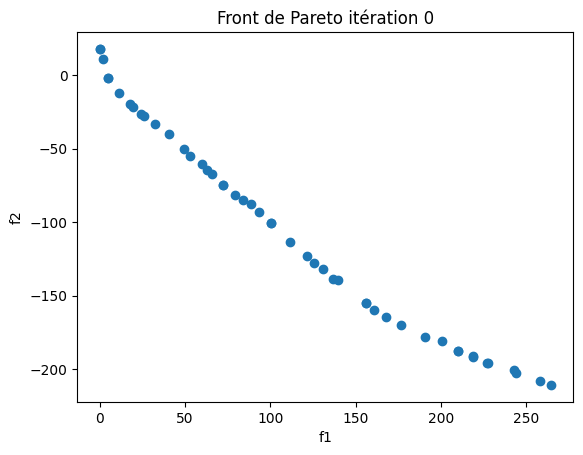

------ Iteration 1 ------
-1.0


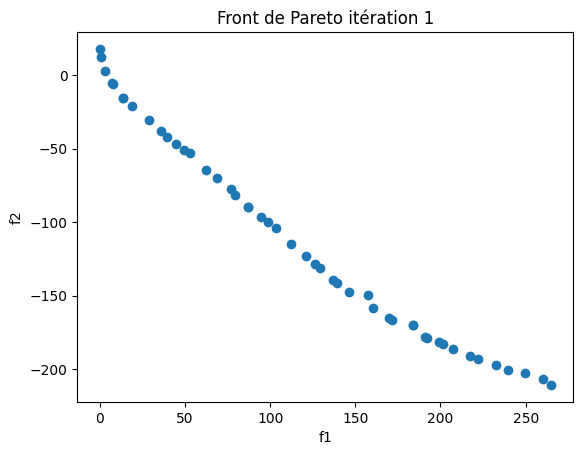

------ Iteration 2 ------
-1.0


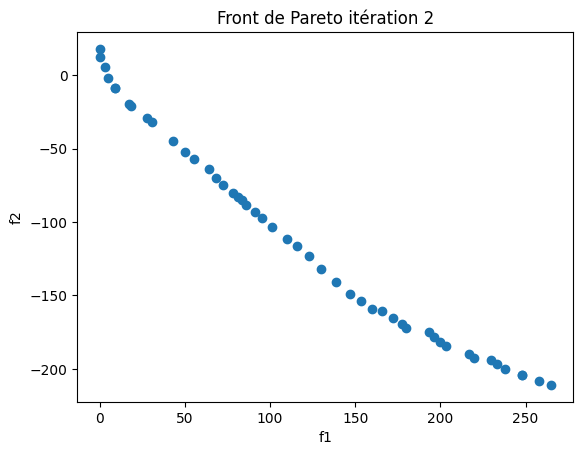

------ Iteration 3 ------
-1.0


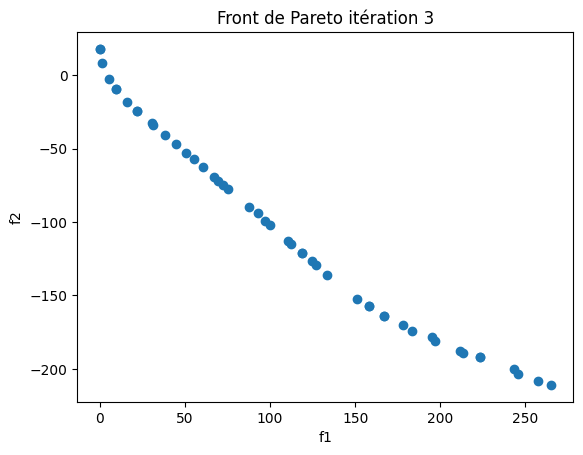

------ Iteration 4 ------
-1.0


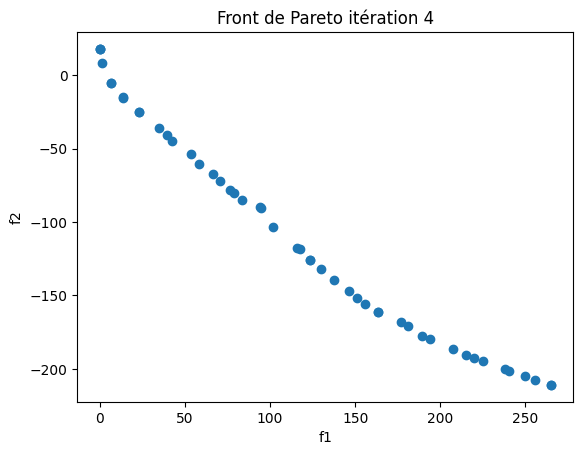

------ Iteration 5 ------
-1.0


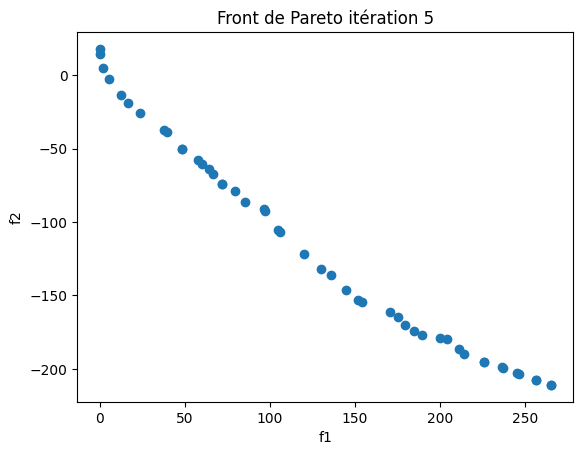

------ Iteration 6 ------
-1.0


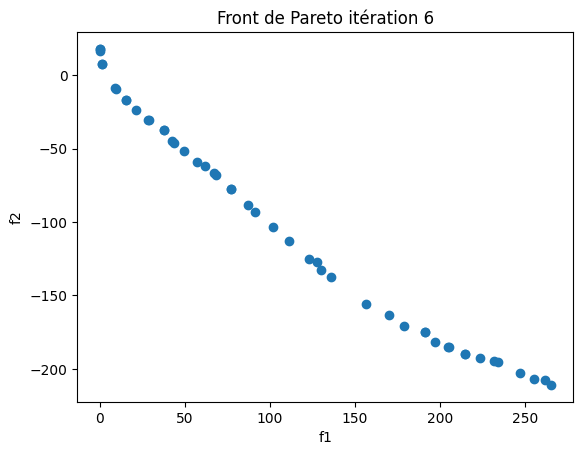

------ Iteration 7 ------
-1.0


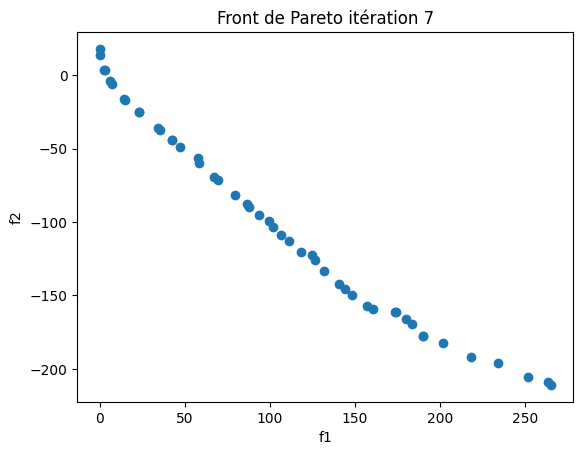

------ Iteration 8 ------
-1.0


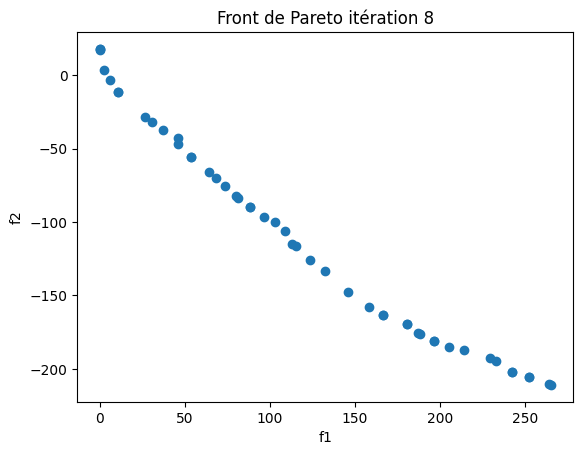

------ Iteration 9 ------
-1.0


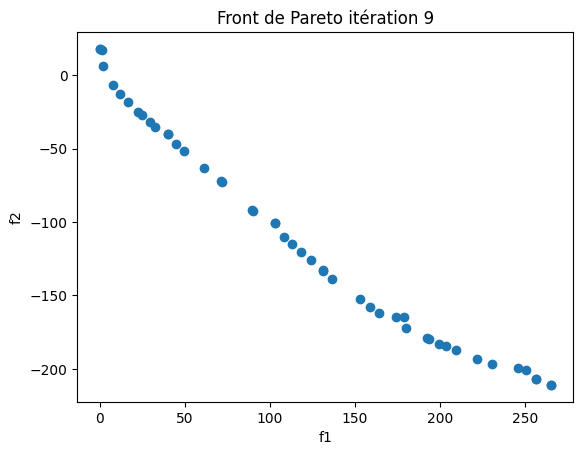

In [142]:
import openturns as ot
import matplotlib.pyplot as plt
import time
# Fonction objective

model = ot.SymbolicFunction(['x', 'y'], ['(x-2)^2+(y-1)^2', '9*x - (y - 1)^2'])

problem = ot.OptimizationProblem(model)
problem.setMinimization(True)
uniform = ot.ComposedDistribution([ot.Uniform(-10, 10), ot.Uniform(-10, 10)])
bounds = ot.Interval([-10,-10],[10,10])
problem.setBounds(bounds)
ot.RandomGenerator.SetSeed(0)
inequality_constraint = ot.SymbolicFunction(["x1", "x2"], ["x1^2 + x2^2 - 225","x1 - 3*x2 + 10"])

init_pop = uniform.getSample(50)

for i in range(10):
    print(f'------ Iteration {i} ------')
    # Définir le callback pour sauvegarder l'état toutes les 10 itérations
    algo = ot.Pagmo(problem, "nsga2", init_pop)
    algo.run()
    result = algo.getResult()

    init_pop = result.getFinalPoints()
    print(result.getAbsoluteError())
    final_pop_y = result.getFinalValues()
    front0 = result.getParetoFrontsIndices()[0] 
    front0_y = final_pop_y.select(front0) 
    tab1 = [front0_y[i][0] for i in range (len(front0_y))]
    tab2 = [front0_y[i][1] for i in range (len(front0_y))]
    
    plt.scatter(tab1,tab2)
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.title(f'Front de Pareto itération {i}')
    plt.show()
    

